In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="#009e84"> ch03. 분류분석</font></b>

# 1절. 분류분석 개요

## 1-1 분류분석이란?

- 타겟변수가 categorical 변수인 분석
    - 수업 ex. mnist 숫자예측, iris 분류예측, 와인등급예측, 질병예측
    - ex. 고객등급예측, 휴면고객예측, 상품구매예측, 보험사기예측,...
- sklearn 패키지 : 예제데이터셋, 전처리, 머신러닝 모형

## 1-2 샘플용 데이터셋 접근

- load 계열(패키지 내에 데이터 있음)

    - load_iris(), load_boston(), load_diabets(),...

- fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)

    - fetch_openml(), fetch_rov1(로이터 뉴스 말뭉치)

- make 계열(가상의 데이터 생성)

    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성
    - make_blobs() : 군집분석용 데이터 생성(타겟변수X)

### load 계열(패키지 내에 데이터 있음)

- load_iris(), load_boston(), load_diabets(),...

In [5]:
# load 계열

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

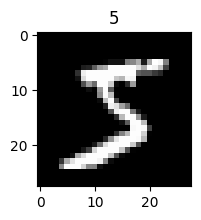

In [6]:
# 첫번째 이미지 출력

plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

### fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)

- fetch_openml(), fetch_rov1(로이터 뉴스 말뭉치)


In [9]:
# fetch 계열

from sklearn.datasets import fetch_openml

mnist = fetch_openml(name='mnist_784',
                     version=1,
                     as_frame=False, # True : 데이터프레임 / False : Numpy배열
                     parser='auto')
X, y = mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

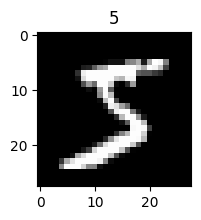

In [11]:
# 첫번째 이미지 출력

plt.figure(figsize=(2,2))
plt.imshow(X[0].reshape(28,28), cmap='gray')
plt.title(y[0])
plt.show()

### make 계열(가상의 데이터 생성)

- make_classification() : 분류분석용 데이터 생성
- make_regression() : 회귀분석용 데이터 생성
- make_blobs() : 군집분석용 데이터 생성(타겟변수X)

# 2절. 분류모형의 종류

- predict()

## 2-1 확률적 모형

- 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
- predict_proba() : 각 분류 클래스별 확률을 알려줌(일부 판별함수 모형에 있기는 함)
- predict_log_proba() : 확률의 로그값을 알려줌

### 1) 확률적 생성 모형

- 각 클래스별 특징 데이터 확률분포 추정하는 방식. 소량의 데이터로도 작동
- ex) QuadraticDiscriminantAnalysis, MultinomialNB

### 2) 확률적 판별 모형

- 확률을 계산하는 함수 이용
- ex) 의사결정나무, 로지스틱 회귀분석

## 2-2 판별함수 모형

- 주어진 데이터를 클래스에 따라 다른 영역으로 나누는 경계면을 찾은 후 이 경계면을 계산하는 식
- decision_function()
- ex) 퍼셉트론, SVM, MLP(신경망)

**★RandomForest, LGBM, XGBost, CatBoost 등의 앙상블 모형이 더 많이 쓰임**

# 3절. 모형1) 확률적 생성 모형

- 베이즈 정리를 사용하여 확률분포 계산

## 3-1 QDA

- x가 연속형(실수)이면서 정규분포라고 가정함

In [12]:
# 샘플 데이터

from sklearn.datasets import make_classification

X, y = make_classification(n_features=2,    # 독립변수 갯수
                           n_informative=2, # 타겟변수에 영향주는 독립변수 갯수
                           n_redundant=0,   # 타겟변수에 영향을 주지 않는 독립변수 갯수
                           n_clusters_per_class=1, # 클래스(그룹) 내 서브그룹수
                           n_classes=2,     # 타겟변수의 class 수
                           n_samples=100,   # 데이터 갯수(행수), 100이 기본값 
                           random_state=9)  # seed값

X.shape, y.shape

((100, 2), (100,))

In [13]:
import numpy as np

np.unique(y)

array([0, 1])

In [14]:
import pandas as pd

pd.Series(y).value_counts()

0    50
1    50
dtype: int64

In [15]:
# y=1로 분류된 데이터

X[y==1].shape, X[y==0].shape

((50, 2), (50, 2))

In [16]:
# 타겟변수의 클래스 균형

y.mean()

0.5

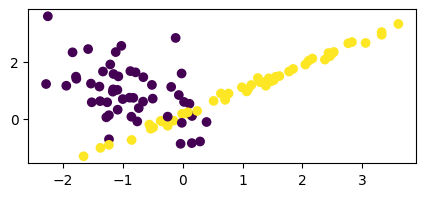

In [18]:
plt.figure(figsize=(5,2))
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

In [19]:
# (0,0) 기준으로 대칭구조

X[y==1] = -X[y==0]

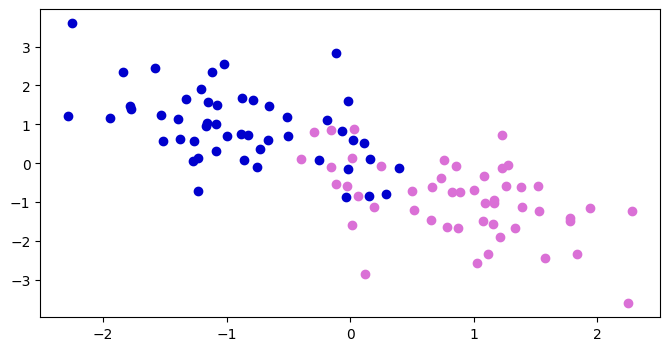

In [25]:
plt.figure(figsize=(8,4))
plt.scatter(x=X[y==0,0], y=X[y==0,1], c='mediumblue')
plt.scatter(x=X[y==1,0], y=X[y==1,1], c='orchid')
plt.show()

In [26]:
# QDA

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X,y)

QuadraticDiscriminantAnalysis()

In [28]:
x=[[0.5,0], [0,0], [-0.5,0]] # predict할때는 2차원 데이터로
model.predict(x)

array([1, 0, 0])

In [29]:
model.predict_proba(x) # 1일 확률 83% 라는말

array([[0.16455419, 0.83544581],
       [0.5       , 0.5       ],
       [0.83544581, 0.16455419]])

In [30]:
model.classes_ # 분류될 내용

array([0, 1])

In [31]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat, rownames=['real'], colnames=['predict'])

predict,0,1
real,,
0,44,6
1,6,44


In [33]:
x = [[0, 0]]
plt.figure(figsize=(8,3))
p = model.predict_proba(x)
p

array([[0.5, 0.5]])

<Figure size 800x300 with 0 Axes>

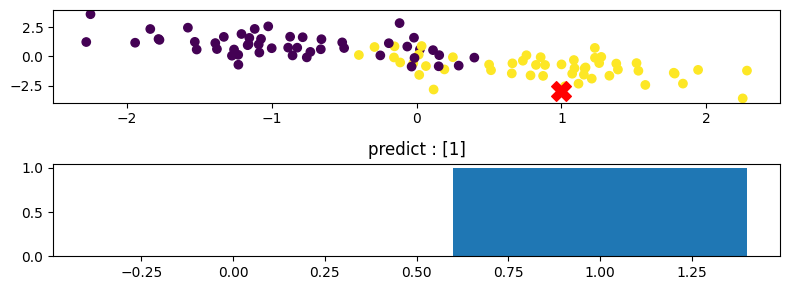

In [50]:
x = [[1, -3]]
p = model.predict_proba(x)

plt.figure(figsize=(8,3))

plt.subplot(211) # 2행 1열로 서브플롯에서 첫번째 그래프
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', marker='X', s=200)
h= model.predict(x)

plt.subplot(212) # 2행 1열로 서브플롯에서 두번째 그래프
plt.bar(model.classes_, p[0]) # 0일확률, 1일확률

plt.title(f'predict : {h}')
plt.tight_layout()
plt.show()

## 3-2 나이브베이지안 모형

In [54]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

# 학습 데이터는 numpy배열 
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1].values 
y = iris.iloc[:, -1].values

# 모형 생성/학습
model = MultinomialNB()
model.fit(X,y)

MultinomialNB()

In [55]:
# 데이터프레임일경우 경고창 뜬다

x = [[5.1, 3.5, 1.4, 0.2]]
h = model.predict(x)
p = model.predict_proba(x)
print('예측 :', h)
print(model.classes_)
print(p)

예측 : ['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


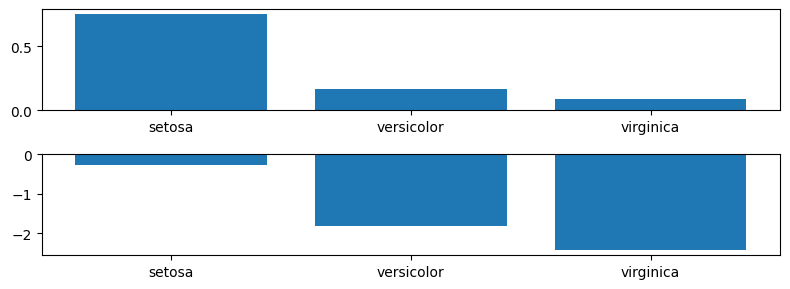

In [59]:
plt.figure(figsize=(8,3))

plt.subplot(211) # 2행 1열로 서브플롯에서 첫번째 그래프
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.subplot(212)
# plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.bar(model.classes_, np.log(model.predict_proba(x))[0])

plt.tight_layout()
plt.show()

# 4절 모형2) 확률적 판별모형

## 4-1 로지스틱 회귀분석

In [77]:
# 샘플 데이터

from sklearn.datasets import make_classification

X, y = make_classification(n_features=1,    # 독립변수 갯수
                           n_informative=1, # 타겟변수에 영향주는 독립변수 갯수
                           n_redundant=0,   # 타겟변수에 영향을 주지 않는 독립변수 갯수
                           n_clusters_per_class=1, # 클래스(그룹) 내 서브그룹수
                           n_classes=2,     # 타겟변수의 class 수
                           n_samples=100,   # 데이터 갯수(행수), 100이 기본값 
                           random_state=1)  # seed값

X.shape, y.shape

((100, 1), (100,))

In [80]:
# 타겟변수의 클래스별 균형

print(y.mean())
print(np.unique(y))

0.5
[0 1]


In [81]:
# 모형

from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)

In [88]:
# -3부터 3까지 같은 간격 데이터

xx = np.linspace(-3, 3, 100)
test_x = xx.reshape(-1, 1)
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)
# prob[:,0] # 0으로 분류될 확률
# prob[:,1] # 1로 분류될 확률

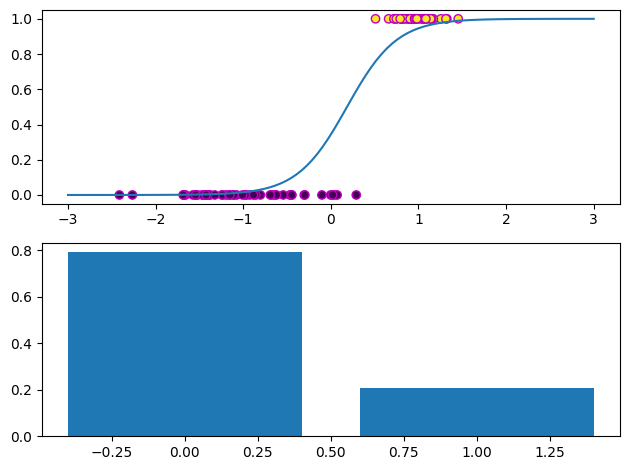

In [95]:
x=[[-0.2]]

plt.subplot(211)
plt.scatter(X, y, c=y, edgecolors='m')
plt.plot(xx, prob[:,1])

plt.subplot(2,1,2)
prob_x = model.predict_proba(x)[0]
plt.bar(model.classes_, prob_x)

plt.tight_layout()
plt.show()

## 4-2 의사결정나무

- 여러가지 규칙을 순차적으로 적용하면서 독립변수 공간을 분할하는 분류모형

In [111]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data[:, 2:] # petal_length, petal_width
# data.target_names[data.target]
y = data.target
feature_names = [name[:-5].replace(' ', '_') for name in data.feature_names[2:]]

In [105]:
# 모형

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', # 품질기준을 entropy
                                  max_depth=1,
                                  random_state=0)

dt_model.fit(X,y) # depth 1짜리 tree라 성능이 좋지 않을듯함

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [108]:
test_x = [X[0]]
dt_model.predict(test_x)

array([0])

생성된 tree 시각화

In [112]:
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image
import io

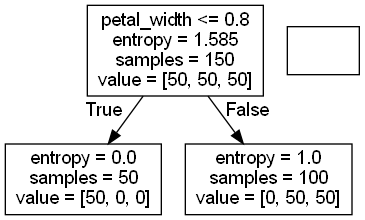

In [113]:
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names=feature_names)

In [115]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
        c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z

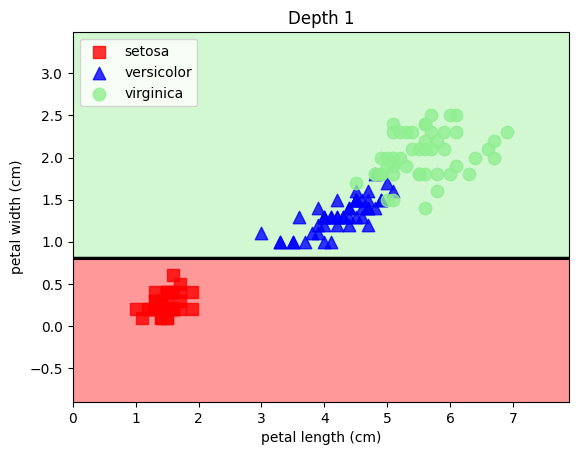

In [116]:
plot_decision_regions(X, y, dt_model, 'Depth 1')
plt.show()

In [117]:
dt_model5 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=5,
                                   random_state=0)
dt_model5.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

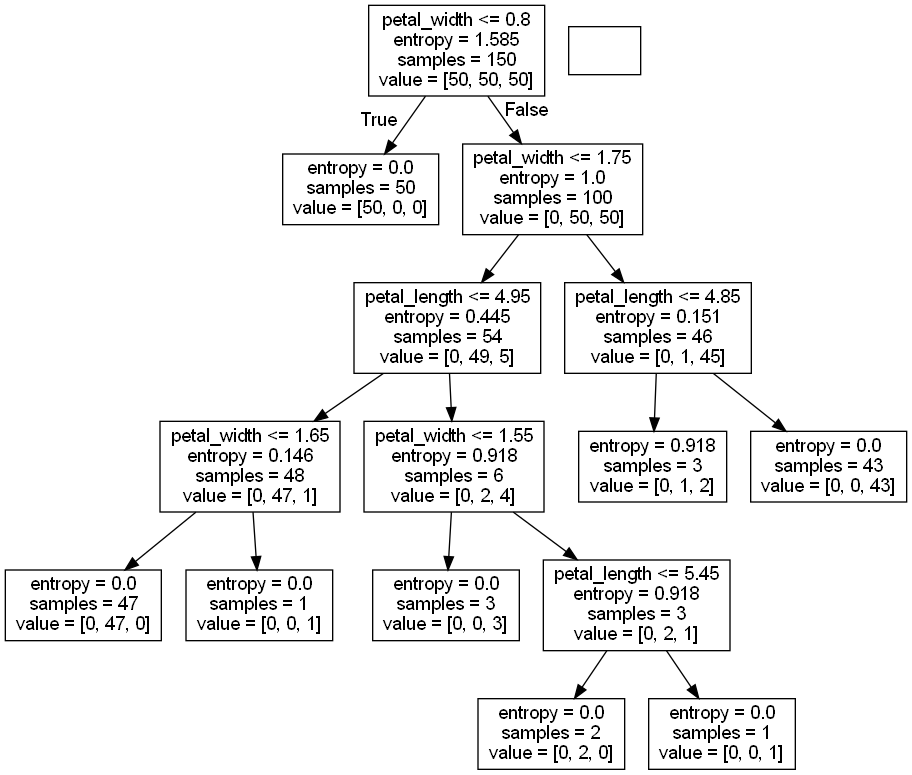

In [118]:
draw_decision_tree(dt_model5, feature_names=feature_names)

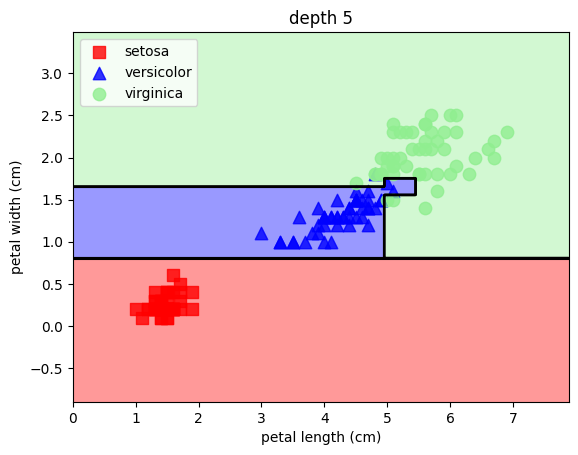

In [119]:
plot_decision_regions(X,y,dt_model5, 'depth 5')
plt.show()

In [120]:
dt_model5.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절. 모형3) 판별함수 모형

- 동일한 클래스가 모여있는 영역과 그 영역을 나누는 경계면을 정의
- decision_function() 제공
- 퍼셉트론, SVN, 인공신경망모형(일부는 predict_proba도 있음)

## 5-1 Perceptron

In [125]:
iris = load_iris()

# 0, 2그룹(setosa, virginica) 만 가져오기
idx = np.in1d(iris.target, [0,2]) # 첫번째 매개변수에서 True인것만 가져와
idx = pd.Series(iris.target).isin([0,2]).values # 위나 아래 같음

In [127]:
X = iris.data[idx, 0:2]
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [129]:
# 퍼셉트론 모형

from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=500, # 학습횟수 (==epoch 500회)
                   eta0=0.1,     # Learning rate
                   random_state=1).fit(X,y)

In [130]:
y_hat = model.predict(X)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [132]:
(y != y_hat).sum()

1

In [133]:
# 예측값이 틀린 경우

X[y != y_hat]

array([[4.5, 2.3]])

In [131]:
pd.crosstab(y, y_hat, rownames=['real'], colnames=['predict'])

predict,0,2
real,,
0,49,1
2,0,50


In [135]:
for idx, (real, hat) in enumerate(zip(y, y_hat)):
    # print(idx, real, hat)
    if real != hat:
        print(f'{idx}번째 실제값 : {real}, 예측값 : {hat} / 데이터 : {X[idx]}')

41번째 실제값 : 0, 예측값 : 2 / 데이터 : [4.5 2.3]


In [140]:
test_x = X[41].reshape(1, -1)
test_x = X[41][np.newaxis, :]
test_x = np.expand_dims(X[41], axis=0)
test_x = X[41][None, :] # 제일 안씀
print(model.predict(test_x))
print(model.decision_function(test_x)) # 큰것과 작은것을 나누는 선에서 1.24밖에 안떨어짐 decision_function 값이 아마 제일 작을듯함. 혼자 틀려서

[2]
[1.24]


In [142]:
test_x = X[0].reshape(1,-1)
print(model.decision_function(test_x))

[-3.134]


## 5-2 SVC

- support Vector Classifier

In [145]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X,y)

SVC(probability=True)

In [146]:
test_x = X[41].reshape(1,-1)
print(test_x)
print('예측 :', model.predict(test_x))
print('경계면과의 거리 :', model.decision_function(test_x))
print('예측 확률들 :', model.predict_proba(test_x))

[[4.5 2.3]]
예측 : [0]
경계면과의 거리 : [-0.72539221]
예측 확률들 : [[0.9092202 0.0907798]]


## 5-3 다중 퍼셉트론(인공신경망)

- predict/ decision_function / predict_proba / predict_log_proba

In [148]:
# 데이터 불러오기

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_X.shape, iris_y.shape

train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=iris_y) # 층화추출

In [150]:
# 다중 퍼셉트론 모형

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,50,30), # hidden layer의 unit수
                    max_iter=500) # epoch

mlp.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [151]:
pred = mlp.predict(test_X)
pd.crosstab(test_y, pred)

col_0,0,1,2
row_0,,,
0,15,0,0
1,0,15,0
2,0,0,15


# 6절. 분류모형 성능평가

## 6-1 sklearn의 모형 평가 방법

- metrict 모듈 : ~_score
- 혼돈행렬을 이용

In [153]:
result = pd.read_csv('data/model_result.csv') # 보험사기자인지 여부(실제값/예측값)
result.info() # 타입과 결측치, 메모리 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CUST_ID  1793 non-null   int64
 1   y_true   1793 non-null   int64
 2   y_pred   1793 non-null   int64
dtypes: int64(3)
memory usage: 42.1 KB


In [155]:
# 실제 보험사기자, 보험사기자로 예측

result['y_true'].sum(), result['y_pred'].sum()

(158, 99)

In [157]:
pd.crosstab(result.y_true, result.y_pred, rownames=['real'], colnames=['predict'], margins=True)

predict,0,1,All
real,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [159]:
confusion_matrix(result.y_true, result.y_pred)

array([[1613,   22],
       [  81,   77]], dtype=int64)

```
           예측0    예측1
	실제0      TN        FP (1종 오류)
	실제1      FN        TP
	T:모델이 맞췄을 때 / F:모델이 틀렸을 때
	P:예측값이 1        / N: 예측값이 0

```

In [160]:
accuracy_score(result.y_true, result.y_pred) # 정확도(전체적으로 얼마나 맞췄니)

0.9425543781372002

In [161]:
precision_score(result.y_true, result.y_pred) # 정밀도(1로 예측한 것 중 얼마나 맞췄는지)

0.7777777777777778

In [163]:
recall_score(result.y_true, result.y_pred) # 재현율(실제로 1중 얼마나 맞췄는지)

0.4873417721518987

In [167]:
recall_score(result.y_true, result.y_pred, pos_label=0) # 특이도(실제로 0중 얼마나 맞췄는지)

0.9865443425076452

In [168]:
# 위양성률(fallout : FPrate) : FP/(TN+FP) : 1종 오류 = 1 - 특이도

1- recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [169]:
f1_score(result.y_true, result.y_pred) # recall과 precision의 조화평균

0.5992217898832685

In [172]:
# beta=1 : f1_score (recall과 precision의 중요도를 똑같이)
print(fbeta_score(result.y_true, result.y_pred, beta=1))

# beta=0.5 : precision의 가중치가 높음(고객의 만족도가 중요)
print(fbeta_score(result.y_true, result.y_pred, beta=0.5))

# beta=2 : recall의 가중치가 높음(회사의 비용이 중요한 경우)
print(fbeta_score(result.y_true, result.y_pred, beta=2))

0.5992217898832685
0.6949458483754513
0.5266757865937073


## 6-2 ROC커브를 이용한 성능 비교

- 위양성률(FPrate)과 재현율(TPrate)의 변화를 시각화 = 모델이 양성을 잘 맞추는 능력(TPrate)과 잘못 예측하는 비율(FPrate)을 비교하는 곡선
- 세로축(재현율) → 높은게 좋음
- 가로축(위양성률) → 낮은게 좋음 

In [173]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X,y = make_classification(n_samples=1000, weights=[0.95,0.05], random_state=5)

In [174]:
model1 = LogisticRegression().fit(X,y)
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)

In [175]:
pred1 = model1.predict(X)
pred2 = model2.predict(X)

In [177]:
pd.crosstab(y, pred1)

col_0,0,1
row_0,,
0,940,3
1,30,27


In [178]:
pd.crosstab(y, pred2)

col_0,0,1
row_0,,
0,940,3
1,30,27
